In [1]:
# Imports
import jax

from qiskit.providers.fake_provider import FakeManila
from qiskit_dynamics.array import Array

from casq import PulseCircuit, PulseSimulator
from casq.gates import GaussianPulseGate


In [2]:
# Configure to use JAX internally
jax.config.update("jax_enable_x64", True)
jax.config.update("jax_platform_name", "cpu")
Array.set_default_backend("jax")


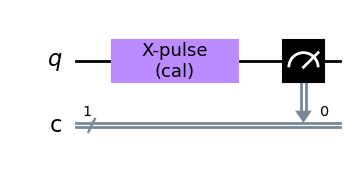

In [3]:
# Create simple circuit with Gaussian pulse as X gate
duration = 256
amplitude = 0.2
sigma = 50
x_pulse = GaussianPulseGate(duration, amplitude, sigma, name="x-pulse")
circuit = PulseCircuit(1, 1)
circuit.pulse(x_pulse, 0)
circuit.measure([0], [0])
circuit.draw("mpl")


In [4]:
# Create dynamics backend for IBMQ Almaden
backend = FakeManila()
dt = backend.configuration().dt
solver_options = {"method": "jax_odeint", "atol": 1e-6, "rtol": 1e-8, "hmax": dt}
simulator = PulseSimulator.from_backend(backend, [0, 1], solver_options=solver_options)
# simulator = PulseSimulator.from_backend(backend, [0, 1])


In [5]:
result = simulator.run(circuit, steps=10, shots=100).result()


2023-06-20 13:36:17.527 | DEBUG    | casq.pulse_simulator:run:133 - Computed time interval to solve over is [[0.0, 5.6888888888888887e-08]].
2023-06-20 13:36:18.864 | DEBUG    | casq.pulse_simulator:_run:218 - 1
2023-06-20 13:36:18.865 | DEBUG    | casq.pulse_simulator:_run:219 - ExperimentResult(shots=100, success=True, meas_level=1, data=ExperimentResultData(memory=[[0.34984577 0.34490865]]), header=QobjHeader(name='innatePulseCircuit', metadata={}), seed=2674059703666886342)
2023-06-20 13:36:18.865 | DEBUG    | casq.common.decorators:wrapped:62 - Executed [run] in 1.364 seconds.


In [6]:
print(result)


Result(backend_name='DynamicsBackend', backend_version='0.1', qobj_id='', job_id='aea0d3bb-2ba6-4aa9-9758-6763d3138bd8', success=True, results=[ExperimentResult(shots=100, success=True, meas_level=1, data=ExperimentResultData(memory=[[0.34984577 0.34490865]]), header=QobjHeader(name='innatePulseCircuit', metadata={}), seed=2674059703666886342)], date=2023-06-20T13:36:18.865554, status=None, header=None)


In [7]:
result.get_counts(0)


QiskitError: 'No counts for experiment "0"'

In [ ]:
from qiskit import schedule as build_schedule
solution = simulator.solver.solve(
    t_span=[[0.0, 5.6888888888888887e-08]],
    y0=simulator.ground_state,
    signals=[build_schedule(circuit, simulator, dt=simulator.solver._dt)],
    t_eval=[0.00000000e+00, 6.32098765e-09, 1.26419753e-08, 1.89629630e-08, 2.52839506e-08, 3.16049383e-08, 3.79259259e-08, 4.42469136e-08, 5.05679012e-08, 5.6888888888888887e-08],
    method="jax_odeint", atol=1e-6, rtol=1e-8, hmax=simulator.solver._dt
)


In [ ]:
print(solution)
